In [2]:
import pandas as pd

In [4]:
data=pd.read_csv("heart.csv")

In [6]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
data.shape

(303, 14)

In [10]:
X=data.drop(columns=['target'])

In [12]:
y=data['target']

In [14]:
from sklearn.model_selection import train_test_split

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=40)

In [18]:
print(X_train.shape)

(242, 13)


In [20]:
print(X_test.shape)

(61, 13)


In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier


In [24]:
from sklearn.ensemble import StackingClassifier

In [26]:
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=10)),
    ('gbdt',GradientBoostingClassifier())
]

In [28]:
model=StackingClassifier(estimators=estimators,final_estimator=LogisticRegression())

In [30]:
model.fit(X_train,y_train)

StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('knn', KNeighborsClassifier(n_neighbors=10)),
                               ('gbdt', GradientBoostingClassifier())],
                   final_estimator=LogisticRegression())

In [32]:
y_perd=model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_perd)

0.7868852459016393

In [36]:
# oob score, bagingg vs random forest, feature importance


data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [38]:
X

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [40]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

In [42]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
69,62,0,0,124,209,0,1,163,0,0.0,2,0,2
118,46,0,1,105,204,0,1,172,0,0.0,2,0,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2
16,58,0,2,120,340,0,1,172,0,0.0,2,0,2
54,63,0,2,135,252,0,0,172,0,0.0,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
268,54,1,0,122,286,0,0,116,1,3.2,1,2,2
193,60,1,0,145,282,0,0,142,1,2.8,1,2,3
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3


In [44]:
X_test

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
18,43,1,0,150,247,0,1,171,0,1.5,2,0,2
112,64,0,2,140,313,0,1,133,0,0.2,2,0,3
102,63,0,1,140,195,0,1,179,0,0.0,2,2,2
275,52,1,0,125,212,0,1,168,0,1.0,2,2,3
92,52,1,2,138,223,0,1,169,0,0.0,2,4,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
288,57,1,0,110,335,0,1,143,1,3.0,1,1,3
146,44,0,2,118,242,0,1,149,0,0.3,1,1,2
240,70,1,2,160,269,0,1,112,1,2.9,1,1,3
167,62,0,0,140,268,0,0,160,0,3.6,0,2,2


In [46]:
rf=RandomForestClassifier(oob_score=True)

In [48]:
rf.fit(X_train,y_train)

RandomForestClassifier(oob_score=True)

In [50]:
rf.score(X_train,y_train)

1.0

In [52]:
rf.oob_score_

0.8223140495867769

In [54]:
y_pred=rf.predict(X_test)

In [56]:
accuracy_score(y_test,y_pred)

0.819672131147541

In [58]:
from sklearn.tree import DecisionTreeClassifier

In [60]:
from sklearn.datasets import make_classification
X,y = make_classification(n_samples=5, n_classes=2,
                               n_features=2, n_informative=2, n_redundant=0,
                               random_state=0)

In [62]:
X

array([[ 0.96399434, -0.12399406],
       [ 1.05699092,  0.69448021],
       [-0.55744457,  0.08369352],
       [-1.19224399, -1.66447018],
       [-0.3874711 ,  1.38366234]])

In [64]:
y

array([0, 1, 0, 1, 0])

In [66]:
DTC=DecisionTreeClassifier()

In [68]:
DTC.fit(X,y)

DecisionTreeClassifier()

In [70]:
from sklearn.tree import plot_tree

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 5\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[0] <= 1.01\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

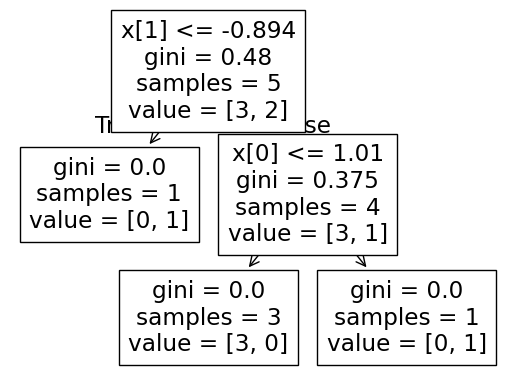

In [72]:
plot_tree(DTC)

In [74]:
DTC.feature_importances_

array([0.625, 0.375])

In [76]:
RFC=RandomForestClassifier(n_estimators=2)

In [78]:
RFC.fit(X,y)

RandomForestClassifier(n_estimators=2)

In [80]:
RFC.feature_importances_

array([0.5, 0.5])

In [82]:
RFC.estimators_[0]

DecisionTreeClassifier(max_features='sqrt', random_state=957786852)

In [84]:
RFC.estimators_[1]

DecisionTreeClassifier(max_features='sqrt', random_state=257421548)

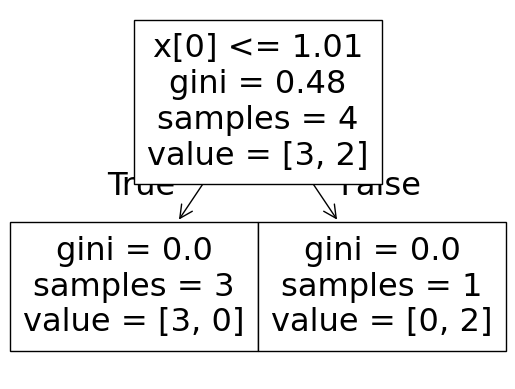

In [86]:
for i in range(0,2):
    plot_tree(RFC.estimators_[i])

[Text(0.4, 0.8333333333333334, 'x[1] <= -0.894\ngini = 0.48\nsamples = 4\nvalue = [3, 2]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.30000000000000004, 0.6666666666666667, 'True  '),
 Text(0.6, 0.5, 'x[1] <= 0.389\ngini = 0.375\nsamples = 3\nvalue = [3, 1]'),
 Text(0.5, 0.6666666666666667, '  False'),
 Text(0.4, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [3, 0]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]')]

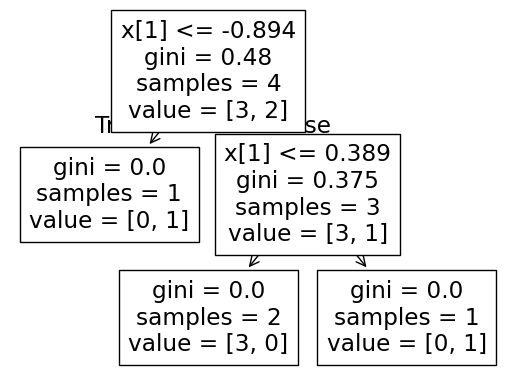

In [88]:
plot_tree(RFC.estimators_[0])

[Text(0.5, 0.75, 'x[0] <= 1.01\ngini = 0.48\nsamples = 4\nvalue = [3, 2]'),
 Text(0.25, 0.25, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(0.375, 0.5, 'True  '),
 Text(0.75, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 2]'),
 Text(0.625, 0.5, '  False')]

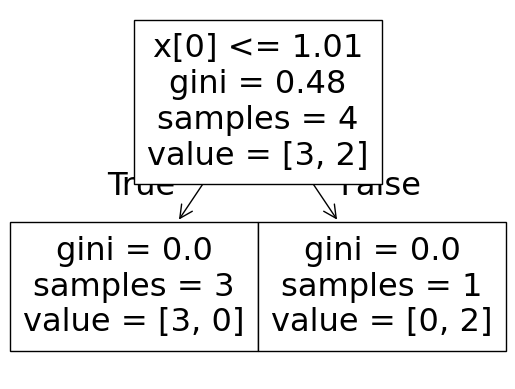

In [90]:
plot_tree(RFC.estimators_[1])

In [92]:
# random forest vs bagging classifier you can can do as a assignment based on my theoritical explnation